In [1]:
#Importing essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
#Importing the data

loan_train = pd.read_csv("Data/train.csv")
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_test = pd.read_csv("Data/test.csv")
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [36]:
#Checking for missing values

total = loan_train.isnull().sum().sort_values(ascending=False)
percent = (loan_train.isnull().sum()/loan_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing_data.head(20)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


Most of the machine learning algorithms cannot handle missing values. We will impute the missing values before going into the next step

In [37]:
#Imputing the missing values

loan_train["Credit_History"] = loan_train["Credit_History"].fillna(loan_train["Credit_History"].dropna().mode().values[0])
loan_train["Self_Employed"] = loan_train["Self_Employed"].fillna(loan_train["Self_Employed"].dropna().mode().values[0])
loan_train["LoanAmount"] = loan_train["LoanAmount"].fillna(loan_train["LoanAmount"].dropna().median())
loan_train["Dependents"] = loan_train["Dependents"].fillna(loan_train["Dependents"].dropna().mode().values[0])
loan_train["Loan_Amount_Term"] = loan_train["Loan_Amount_Term"].fillna(loan_train["Loan_Amount_Term"].dropna().mode().values[0])
loan_train["Gender"] = loan_train["Gender"].fillna(loan_train["Gender"].dropna().mode().values[0])
loan_train["Married"] = loan_train["Married"].fillna(loan_train["Married"].dropna().mode().values[0])



In [11]:
#Checking to see whether there are any missing values 

print(loan_train.isnull().sum().sort_values(ascending=False))

Loan_Status          0
Property_Area        0
Credit_History       0
Loan_Amount_Term     0
LoanAmount           0
CoapplicantIncome    0
ApplicantIncome      0
Self_Employed        0
Education            0
Dependents           0
Married              0
Gender               0
Loan_ID              0
dtype: int64


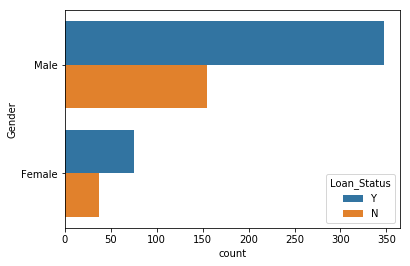

In [12]:
#Exploratory Data Analysis
#In this visualization, I wanted to check genderwise loan status. Men have a higher approval and decline rate compared to women

sns.countplot(y="Gender",hue ="Loan_Status",data=loan_train)

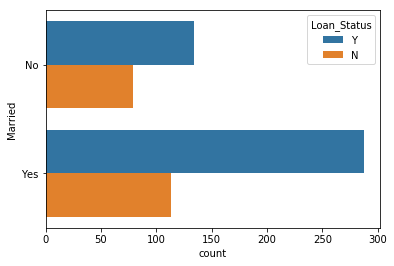

In [13]:
sns.countplot(y="Married",hue ="Loan_Status",data=loan_train)

If you are married, it is easier to get an approval on the loan application

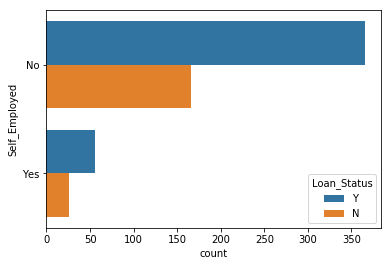

In [15]:
sns.countplot(y="Self_Employed",hue ="Loan_Status",data=loan_train)

In [ ]:
If you are Self-Employed, chances of loan approval is less

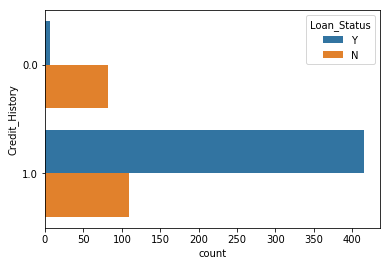

In [16]:
sns.countplot(y="Credit_History",hue ="Loan_Status",data=loan_train)

In [ ]:
As evident, a good credit history leads to more loan approval

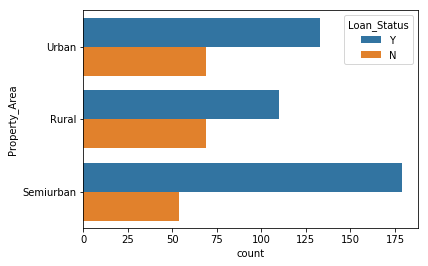

In [20]:
sns.countplot(y="Property_Area",hue ="Loan_Status",data=loan_train)

The semiUrban population takes more loan compared to the Urban(close second) and the Rural

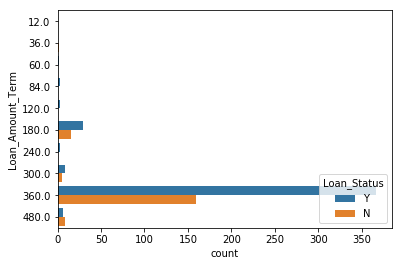

In [21]:
sns.countplot(y="Loan_Amount_Term",hue ="Loan_Status",data=loan_train)

The 36 month loan is favourite among high population of people

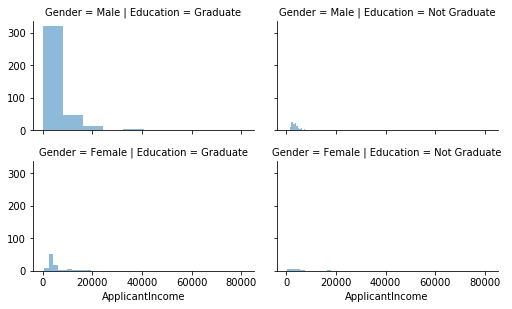

In [22]:
grid = sns.FacetGrid(loan_train,row='Gender', col='Education',size= 2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5,bins=10)
grid.add_legend()

A graduate male earns the highest income while the female with no graduate degree earns the least

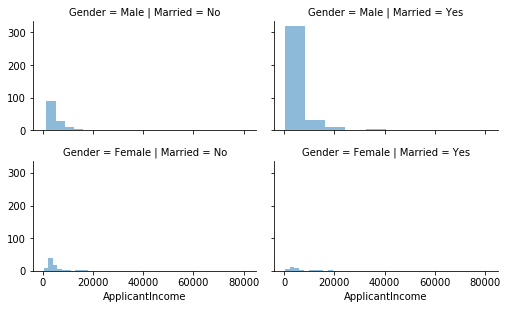

In [23]:
grid = sns.FacetGrid(loan_train,row='Gender', col='Married',size= 2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5,bins=10)
grid.add_legend()

In [ ]:
A married male has a higher income while an married female has the least

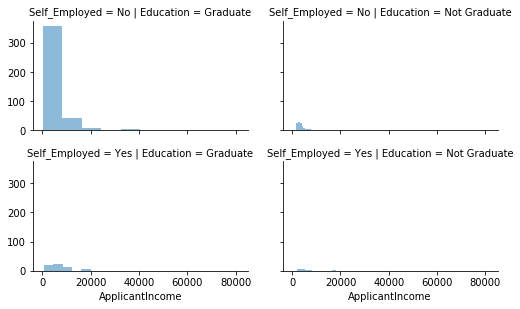

In [24]:
grid = sns.FacetGrid(loan_train,row='Self_Employed', col='Education',size= 2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5,bins=10)
grid.add_legend()

A self-employed with a graduate degree has the highest income

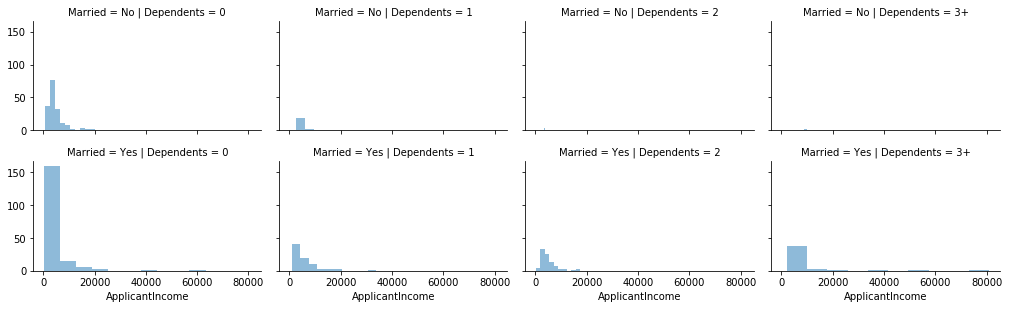

In [25]:
grid = sns.FacetGrid(loan_train,row='Married', col='Dependents',size= 2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5,bins=10)
grid.add_legend()

Married with no Dependents have the highest income 

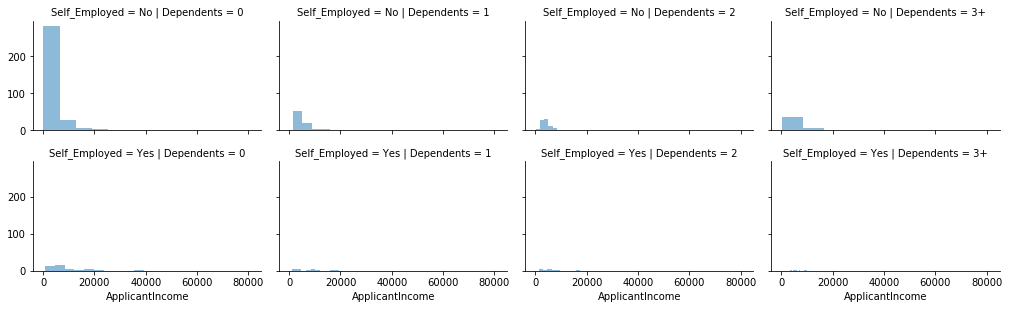

In [26]:
grid = sns.FacetGrid(loan_train,row='Self_Employed', col='Dependents',size= 2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5,bins=10)
grid.add_legend()

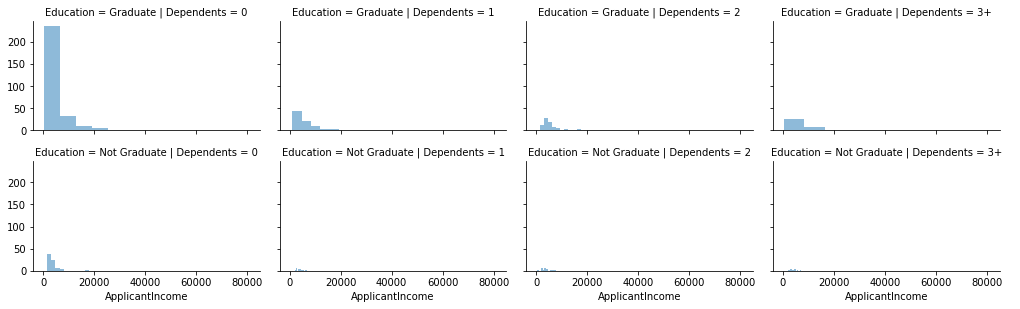

In [27]:
grid = sns.FacetGrid(loan_train,row='Education', col='Dependents',size= 2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=0.5,bins=10)
grid.add_legend()

In [38]:
#Converting categorical variables into numerical variables

code_numeric = {"Male": 1, "Female": 2,
                "Yes": 1, "No": 2,
                "Graduate": 1, "Not Graduate": 2,
                "Urban": 3, "Semiurban": 2,"Rural": 1,
                "Y": 1, "N": 0,
                "0" :0,
                "1" :1,
                "2" :2,
                "3" :3,
                "3+": 3
                  }

In [39]:
loan_train = loan_train.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
loan_test = loan_test.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
#drop the uniques loan id
loan_train.drop("Loan_ID", axis = 1, inplace = True)

In [40]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null int64
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
dtypes: float64(4), int64(8)
memory usage: 57.6 KB


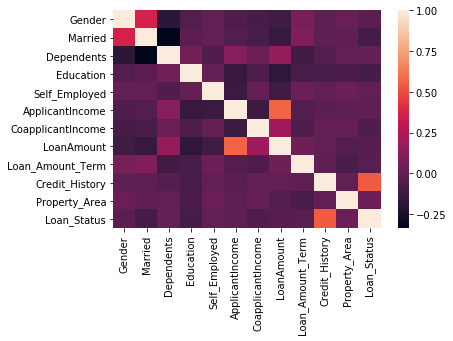

In [41]:
sns.heatmap(loan_train.corr())

In [42]:
y = loan_train["Loan_Status"]
X = loan_train.drop("Loan_Status", axis = 1)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [44]:
!pip3 install xgboost
import xgboost as xgb

     |████████████████████████████████| 1.1 MB 4.2 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [45]:
#Splitting the data into training and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [46]:
#Implementing Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
ypred = model.predict(X_test)
evaluation = f1_score(y_test, ypred)
evaluation

/Users/smitakshigupta/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.897119341563786

In [47]:
#Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
ypred_tree = tree.predict(X_test)
evaluation = f1_score(y_test,ypred_tree)

In [52]:
evaluation

0.8219178082191781

In [53]:
# Random Forest
tree= RandomForestClassifier()
tree.fit(X_train,y_train)
ypred_tree = tree.predict(X_test)
evaluation = f1_score(y_test,ypred_tree)
evaluation

0.8691983122362867

In [58]:
#Implementing Xgboost
tree = xgb.XGBClassifier()
tree.fit(X_train,y_train)
ypred_tree = tree.predict(X_test)
evaluation = f1_score(y_test,ypred_tree)
evaluation

0.897119341563786

In [59]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [60]:
tree = AdaBoostClassifier()
tree.fit(X_train,y_train)
ypred_tree = tree.predict(X_test)
evaluation = f1_score(y_test,ypred_tree)
evaluation

0.8916666666666667